In [2]:
import numpy as np 
import pandas as pd 

In [3]:
df = pd.read_csv("Training_Penguins_data.csv")

In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_kg,sex
0,Adelie,Torgersen,41.1,17.6,182,3.757,female
1,Adelie,Torgersen,38.6,21.2,191,3.758,male
2,Adelie,Torgersen,34.6,21.1,198,3.759,male
3,Adelie,Torgersen,36.6,17.8,185,3.760,female
4,Adelie,Torgersen,38.7,19.0,195,3.761,female


In [5]:
df.info() # quick information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            286 non-null    object 
 1   island             286 non-null    object 
 2   bill_length_mm     286 non-null    float64
 3   bill_depth_mm      286 non-null    float64
 4   flipper_length_mm  286 non-null    int64  
 5   body_mass_kg       286 non-null    float64
 6   sex                286 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 15.8+ KB


In [6]:
df.isna().any() # check if there is nan val.

species              False
island               False
bill_length_mm       False
bill_depth_mm        False
flipper_length_mm    False
body_mass_kg         False
sex                  False
dtype: bool

In [7]:
total_samples = len(df)
print("Total samples' count:",total_samples)

Total samples' count: 286


# Seperate dataset by Gender

In [8]:
grouped_gender = df.groupby(by='sex')
df_male = grouped_gender.get_group('male')
df_female = grouped_gender.get_group('female')

In [9]:
def resIndex(dataset):
    # Reset index for given dataset.
    return dataset.reset_index(drop=True,inplace=True)

In [10]:
df_male

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_kg,sex
1,Adelie,Torgersen,38.6,21.2,191,3.758,male
2,Adelie,Torgersen,34.6,21.1,198,3.759,male
5,Adelie,Torgersen,42.5,20.7,197,3.762,male
7,Adelie,Torgersen,46.0,21.5,194,3.764,male
8,Adelie,Biscoe,38.8,17.2,180,3.769,male
...,...,...,...,...,...,...,...
276,Chinstrap,Dream,50.2,18.8,202,4.073,male
278,Chinstrap,Dream,51.9,19.5,206,4.075,male
281,Chinstrap,Dream,55.8,19.8,207,4.078,male
283,Chinstrap,Dream,49.6,18.2,193,4.080,male


In [11]:
resIndex(df_male)
resIndex(df_female)

In [12]:
df_male

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_kg,sex
0,Adelie,Torgersen,38.6,21.2,191,3.758,male
1,Adelie,Torgersen,34.6,21.1,198,3.759,male
2,Adelie,Torgersen,42.5,20.7,197,3.762,male
3,Adelie,Torgersen,46.0,21.5,194,3.764,male
4,Adelie,Biscoe,38.8,17.2,180,3.769,male
...,...,...,...,...,...,...,...
140,Chinstrap,Dream,50.2,18.8,202,4.073,male
141,Chinstrap,Dream,51.9,19.5,206,4.075,male
142,Chinstrap,Dream,55.8,19.8,207,4.078,male
143,Chinstrap,Dream,49.6,18.2,193,4.080,male


In [13]:
print("Unique:",df_male.sex.nunique())
print("***")
df_male.tail()

Unique: 1
***


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_kg,sex
140,Chinstrap,Dream,50.2,18.8,202,4.073,male
141,Chinstrap,Dream,51.9,19.5,206,4.075,male
142,Chinstrap,Dream,55.8,19.8,207,4.078,male
143,Chinstrap,Dream,49.6,18.2,193,4.080,male
144,Chinstrap,Dream,50.8,19.0,210,4.081,male


In [14]:
features,labels_m,labels_f = df_male.iloc[:,:-1],df_male.iloc[:,-1],df_female.iloc[:,-1] # [rows,cols],

# Probability Male or Female

In [15]:
# m refer to Male, f refer to Female
count_m = labels_m.count()
count_f = labels_f.count()

p_male =  count_m / total_samples #priori male
p_female = count_f / total_samples # priori female
print("Total Male Samples: {0}\nTotal Female Samples: {1}".format(count_m,count_f))
print("P(Male): {0}\nP(Female): {1}".format(p_male,p_female))

Total Male Samples: 145
Total Female Samples: 141
P(Male): 0.506993006993007
P(Female): 0.493006993006993


# Find Features Types : Discrete or Continous

In [16]:
features.species.dtype # How to reach data type of a feature. .... -> dataset.feature_Name.dtype

dtype('O')

In [17]:
def divDiscreteAndContinous(data):
    '''
    Input: data
    output: types of features in dataset
    '''
    discrete,continous = list(),list()
    for i in range(len(data.keys())):
        feature_type = data[data.keys()[i]].dtype # get data type 
        feature_name = data.keys()[i] # get feature name 
        if feature_type == 'O': # if data type is object its mean the feature is discrete. 
            discrete.append(feature_name)
        else: 
            continous.append(feature_name)
    return discrete,continous

In [18]:
discrete,continous = divDiscreteAndContinous(features)
print("discrete:",discrete)
print("continous:",continous)


discrete: ['species', 'island']
continous: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_kg']


# Calculate Probabilities of Discrete Features

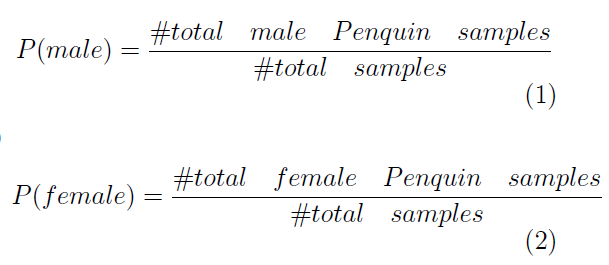

In [19]:
def calcProbsDiscrete(data,discrete):
    '''
    Input: dataset and discrete features
    Output: all possible probabilities of the features of dataset
    '''
    probs_table = pd.DataFrame({'Feature Name':[],'Count':[],'Total':[],'Probability':[],'Gender':[]})
    features_count = dict() # will hold feature as  probability condition : counts 
    features_values = set() # feature probabilities
    probs = dict() # will hold probabilities of each features case
    
    # I created all features' probabilities 
    for i in range(len(data)):
        for feature in discrete:
            value = data.iloc[i][feature]
            feature_val = str(feature)+" = "+str(value)
            features_values.add(feature_val)
            
    # initialize feature_values
    for e in features_values:
        features_count[e] = 0
    
    # Add All possibilities' numbers
    for i in range(len(data)):
        # Add discrete features possibilities
        for feature_d in discrete:
            value = data.iloc[i][feature_d] # get value of the discrete feature
            feature_val = str(feature_d)+" = "+str(value) # create name of discrete feature and its value
            if feature_val in features_count.keys(): # if discrete feature val in all features possiblities
                features_count[feature_val] += 1  # increase its count
    
    # Calculate possiblity of each probability
    # Reminder >> features_count is a dict as {Probability Condition : Counts}
    for prob_name,number in features_count.items():
        prob = number / len(data) # Count of condition / all samples
        new_value = {'Feature Name':prob_name,'Count':number,'Total':len(data),'Probability':prob,'Gender':data.sex[0]}
        probs_table = probs_table.append(new_value,ignore_index=True)
    return probs_table


In [20]:
discrete_probs_m = calcProbsDiscrete(df_male,discrete) # m refer to male class
discrete_probs_f = calcProbsDiscrete(df_female,discrete) # f refer to female class

In [21]:
discrete_probs_m # Probabilities of features if class = male

,Feature Name,Count,Total,Probability,Gender
0,species = Chinstrap,31.0,145.0,0.213793,male
1,species = Gentoo,56.0,145.0,0.386207,male
2,island = Torgersen,20.0,145.0,0.137931,male
3,species = Adelie,58.0,145.0,0.400000,male
4,island = Biscoe,71.0,145.0,0.489655,male
5,island = Dream,54.0,145.0,0.372414,male


In [22]:
discrete_probs_m['Feature Name'][0]

'species = Chinstrap'

In [23]:
# Discrete olasılıkların toplamı 1 'e eşit olmalı bu yüzden bunu kontrol ettim.'
t = 0
for i in range(len(discrete_probs_m)):
    feature = (discrete_probs_m['Feature Name'])[i]
    prob = feature.split('=')[0].strip()
    if prob == 'species':
        print("DURUM:",feature,"OLASILIK:",discrete_probs_m['Probability'][i])
        t += discrete_probs_m['Probability'][i]
print("OLASILIKLARIN TOPLAMI:",t)

DURUM: species = Chinstrap OLASILIK: 0.21379310344827587
DURUM: species = Gentoo OLASILIK: 0.38620689655172413
DURUM: species = Adelie OLASILIK: 0.4
OLASILIKLARIN TOPLAMI: 1.0


In [24]:
# Purpose of creating table is easily calculate probabilities when predicting gender
# Feature-Probability Male - Probability Female

discrete_probs_all = pd.DataFrame({'Feature Name':[],'Probs for Male':[],'Probs for Female':[]})
for i in range(len(discrete_probs_m)):
    feature_name = discrete_probs_m['Feature Name'][i]
    prob_m = discrete_probs_m['Probability'][i]
    prob_f = discrete_probs_f['Probability'][i]
    new_value = {'Feature Name':feature_name,'Probs for Male':prob_m,'Probs for Female':prob_f}
    discrete_probs_all = discrete_probs_all.append(new_value,ignore_index=True)

#Show table
display(discrete_probs_all)

,Feature Name,Probs for Male,Probs for Female
0,species = Chinstrap,0.213793,0.212766
1,species = Gentoo,0.386207,0.375887
2,island = Torgersen,0.137931,0.141844
3,species = Adelie,0.400000,0.411348
4,island = Biscoe,0.489655,0.489362
5,island = Dream,0.372414,0.368794


# Calculate Probabilities of Continous Features

In [25]:
continous

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_kg']

In [26]:
# Purpose of creating table is easily calculate probabilities when predicting gender
# Feature-Probability Male - Probability Female

def continous_info(male,female,continous):
    table = pd.DataFrame({"Feature Name":[],"Male Class Mean":[],"Male SD":[],"Female Class Mean":[],"Female SD":[]})
    for feature in continous:
        mean_m = male[feature].mean()
        std_m = male[feature].std() 
        mean_f = female[feature].mean()
        std_f = female[feature].std()
        new_value = pd.DataFrame({"Feature Name":[feature],"Male Class Mean":[mean_m],"Male SD":[std_m],"Female Class Mean":[mean_f],"Female SD":[std_f]})
        table = table.append(new_value,ignore_index=True)
    return table

In [27]:
meanStd_all = continous_info(df_male,df_female,continous)
resIndex(meanStd_all)
meanStd_all

,Feature Name,Male Class Mean,Male SD,Female Class Mean,Female SD
0,bill_length_mm,46.293793,5.309546,42.310638,4.966296
1,bill_depth_mm,17.794483,1.847625,16.305674,1.755146
2,flipper_length_mm,205.662069,14.443963,198.404255,12.410813
3,body_mass_kg,3.929428,0.091206,3.927440,0.091956


> Gaussian Distribution Formula 
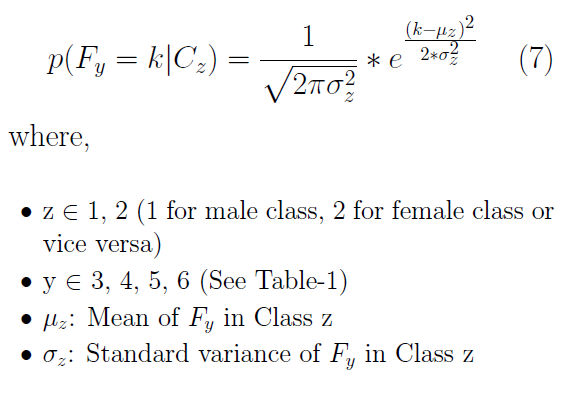


> <b> Gaussian Distribution Formula is incorrect in the image. It's lack of minus of exponential. I added it when coding. Before add accuracy was 0.22, after adding, accuracy is 0.67 </b>

In [28]:
print("Euler:",np.e)
print("Pi:",np.pi)

Euler: 2.718281828459045
Pi: 3.141592653589793


In [29]:
def gaussianDistrib(value,std,mean):
    payda = np.sqrt(2 * np.pi * (std ** 2))
    e_pay = -1 * (value-mean) ** 2
    e_payda = 2 * (std ** 2) 
    carp = np.e ** (e_pay/e_payda)
    result = (1 / payda) * carp
    return result

In [30]:
x,s,m = 1,1,1
print(gaussianDistrib(x,s,m))

0.3989422804014327


In [31]:
# Now we have two table(data frame) which are consist on probabilities of each class.
# discrete_probs_all : Probabilities of each class for Discrete features
# meanStd_all : We can calculate probabilities help with meanStd_all table by looking class

# Bayes Theorem

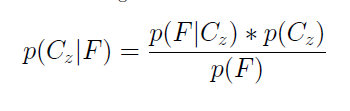

* F: Feature vector of a test sample, including every feature(6 features)
* Cz: Class z (2 classes)

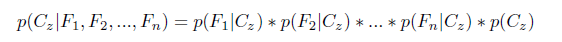
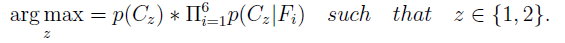

Equation is above will calculated. Predicted class is greater.

In [32]:
def findIndex(table,feature):
    # return index of feature which is looking.
    ind = list(table['Feature Name']).index(feature)
    return ind 

def getProbMale_d(table,index):
    # return probability of the feature. Feature can be found by helping findIndex func.
    prob = list(table['Probs for Male'])[index]
    feature = list(table['Feature Name'])[index]
    print(f"MALE_D\tFEATURE:{feature}\tPROB:{prob}")
    
    return prob

def getProbFemale_d(table,index):
    # return probability of the feature. Feature can be found by helping findIndex func.
    prob = list(table['Probs for Female'])[index]
    feature = list(table['Feature Name'])[index]
    print(f"FEMALE_D\tFEATURE:{feature}\tPROB:{prob}")
    
    return prob

def getProbMale_c(table,index,val):
    # return probability of the feature. Feature can be found by helping findIndex func.
    mean = list(table['Male Class Mean'])[index] 
    std = list(table['Male SD'])[index]
    prob = gaussianDistrib(val,std,mean)
    feature = list(table['Feature Name'])[index]
    print(f"MALE_C\tFEATURE:{feature}\tVAL:{val}\tMEAN:{mean}\tSTD:{std}\tPROB:{prob}")
    
    return prob

def getProbFemale_c(table,index,val):
    # return probability of the feature. Feature can be found by helping findIndex func.
    mean = list(table['Female Class Mean'])[index] 
    std = list(table['Female SD'])[index]
    prob = gaussianDistrib(val,std,mean)
    feature = list(table['Feature Name'])[index]
    print(f"FEMALE_C\tFEATURE:{feature}\tVAL:{val}\tMEAN:{mean}\tSTD:{std}\tPROB:{prob}")
    
    
    return prob


In [33]:
def calcProbMale(probs_disc,probs_cont,datapoint):
    '''
    Input: probs_disc = It holds probabilities of each class for discrete features(discrete_probs_all),
       probs_cont = It holds probabilities of each class for continous features(continous_probs_all),
       datapoint = It holds given continous values list. 
    Output: prob = It holds probability to be male for all features.
    '''
    X_disc = list(datapoint)[:2]
    X_disc[0] = "species = "+X_disc[0] 
    X_disc[1] = "island = "+X_disc[1]
    
    X_cont = list(datapoint)[2:]
    
    prob = 1
    # Use the discrete features' probabilities. Iterate each over in discrete_probs_all.
    for feature in X_disc:
        index = findIndex(probs_disc,feature)
        prob_d = getProbMale_d(probs_disc,index)
        prob *= prob_d
    # # Use the continous features' std and mean to calculate gaussian distrib and prob.. Iterate each over in discrete_probs_all.
    for index in range(len(X_cont)):
        val = X_cont[index]
        
        prob_c = getProbMale_c(probs_cont,index,val)
        prob *= prob_c
    
    return prob 

def calcProbFemale(probs_disc,probs_cont,datapoint):
    '''
    Input: probs_disc = It holds probabilities of each class for discrete features(discrete_probs_all),
       probs_cont = It holds probabilities of each class for continous features(continous_probs_all),
       datapoint = It holds given continous values list. 
    Output: prob = It holds probability to be male for all features.
    '''

    X_disc = list(datapoint)[:2]
    X_disc[0] = "species = "+X_disc[0]
    X_disc[1] = "island = "+X_disc[1]
    X_cont = list(datapoint)[2:]
    
    prob = 1
    # Use the discrete features' probabilities. Iterate each over in discrete_probs_all.
    for feature in X_disc:
        index = findIndex(probs_disc,feature)
        prob_d = getProbFemale_d(probs_disc,index)
        prob *= prob_d
    
    # # Use the continous features' std and mean to calculate gaussian distrib and prob.. Iterate each over in discrete_probs_all.
    for index in range(len(X_cont)):
        val = X_cont[index]
        prob_c = getProbFemale_c(probs_cont,index,val)
        prob *= prob_c
    
    return prob 


def predict_gender(probs_disc,probs_cont,p_male,p_female,data):
    X,y = data.iloc[:,:-1],data.iloc[:,-1]
    predictions = list()
    for i in range(len(X)):
        print("\n***\n",i+1,".prediction done!")
        datapoint = X.iloc[i,:]
        prob_male = calcProbMale(probs_disc,probs_cont,datapoint) *p_male
        prob_female = calcProbFemale(probs_disc,probs_cont,datapoint) *p_female
        pred = np.argmax([prob_male,prob_female])
        if pred == 0 :
            predictions.append('male')
        else:
            predictions.append('female')
    return predictions

In [34]:
df_test = pd.read_csv('Testing_Penguins_Data.csv')
df_test.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_kg,sex
44,Chinstrap,Dream,51.3,19.2,193,4.017,male
45,Chinstrap,Dream,45.4,18.7,188,4.018,female
46,Chinstrap,Dream,52.7,19.8,197,4.019,male
47,Chinstrap,Dream,45.2,17.8,198,4.020,female
48,Chinstrap,Dream,46.1,18.2,178,4.021,female


In [35]:
X,y = df_test.iloc[:,:-1],df_test.iloc[:,-1]

# a. Guess class of each test sample in the test set with a trained model 

In [36]:
yhat = predict_gender(discrete_probs_all,meanStd_all,p_male,p_female,df_test)


***
 1 .prediction done!
MALE_D	FEATURE:species = Adelie	PROB:0.4
MALE_D	FEATURE:island = Torgersen	PROB:0.13793103448275862
MALE_C	FEATURE:bill_length_mm	VAL:39.1	MEAN:46.293793103448266	STD:5.309546181298455	PROB:0.030007930704763333
MALE_C	FEATURE:bill_depth_mm	VAL:18.7	MEAN:17.79448275862068	STD:1.8476253269153362	PROB:0.19148655094694528
MALE_C	FEATURE:flipper_length_mm	VAL:181	MEAN:205.66206896551725	STD:14.443962930376815	PROB:0.006429392337488176
MALE_C	FEATURE:body_mass_kg	VAL:3.75	MEAN:3.9294275862068977	STD:0.09120640091051617	PROB:0.6316730711215078
FEMALE_D	FEATURE:species = Adelie	PROB:0.41134751773049644
FEMALE_D	FEATURE:island = Torgersen	PROB:0.14184397163120568
FEMALE_C	FEATURE:bill_length_mm	VAL:39.1	MEAN:42.310638297872316	STD:4.966296437381821	PROB:0.06518117238779542
FEMALE_C	FEATURE:bill_depth_mm	VAL:18.7	MEAN:16.305673758865254	STD:1.75514643465786	PROB:0.08963790172480016
FEMALE_C	FEATURE:flipper_length_mm	VAL:181	MEAN:198.40425531914894	STD:12.410812522844894

In [37]:
print(yhat)

['female', 'female', 'female', 'female', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'male', 'male', 'female', 'female', 'female', 'female', 'female', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'female', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male']


# Compute Total Accuracy and Confusion Matrix

In [38]:
def totalAccuracy(y,yhat):
    '''
    y : real
    yhat : pred
    # Total Accuracy : True / total
    Let's assume that Male: Positive
                      Female: Negative 
    # Class Accuracy: True Male / Total Male in Real (TP)  
                      False Male / Real Male (FP)
                      True Female / Total Female in Real (TN)  
                      False Female / Real Female (FN)
    '''
    total = len(y)
    true_count = 0
    TP_count = 0
    TN_count = 0
    FP_count = 0
    FN_count = 0
    real_male_count = 0
    real_female_count = 0

    for i in range(total):
        if y[i] == yhat[i]:
            true_count +=1
            
        if y[i] == 'male':
            real_male_count +=1
        elif y[i] == 'female':
            real_female_count +=1
        
        if y[i] == 'male' and yhat[i] == 'male':
            TP_count +=1
        elif y[i] == 'male' and yhat[i] == 'female':
            FP_count +=1
        elif y[i] == 'female' and yhat[i] == 'female':
            TN_count += 1
        else:
            FN_count +=1
    
    confusion_matrix = [[TP_count,FP_count],[FN_count,TN_count]]
    acc = true_count / total
   
    return acc,confusion_matrix

In [39]:
acc,cm = totalAccuracy(y,yhat)

In [40]:
# Total Accuracy
print("accuracy:",acc)

accuracy: 0.673469387755102


In [41]:
print("Confusion Matrix:",cm) # confusion_matrix

Confusion Matrix: [[12, 12], [4, 21]]


In [42]:
# My confusion matrix : [TP,FP,FN,TN]
# Accuracy = (TP+TN) / (TP+TN+FN+FP)
acc_derived = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
acc_derived

0.673469387755102

In [43]:
# Each class accuracy : 
# Pred Male / Total Real Male (it's mean TP / TP+FP)
# Pred Female / Total Real Female (it's mean TN / TN+FN)

male_acc = cm[0][0] / (cm[0][0]+cm[0][1])
female_acc = cm[1][0] / (cm[1][0]+cm[1][1])
print("Male Acc:",male_acc)
print("Female Acc:",female_acc)

Male Acc: 0.5
Female Acc: 0.16


## Confusion Matrix 
> I defined Male class as Positive, Female class as Negative
* my confusion matrix style : 
<table>
    <tr> 
        <td>TP
        </td>
        <td>FP
        </td>
    </tr>
      <tr>
        <td>FN
        </td>
        <td>TN
        </td>
    </tr>
    </table>
    
* calculated scores
<table>
<tr> 
    <td>12
    </td>
    <td>12
    </td>
</tr>
  <tr>
    <td>4
    </td>
    <td>21
    </td>
</tr>
</table>

- Accuracy = (TP+TN) / (TP+TN+FN+FP) = 0.673469387755102
- Each class accuracy : 
    - Pred Male / Total Real Male (it's mean TP / TP+FP) = 0.5
    - Pred Female / Total Real Female (it's mean TN / TN+FN) = 0.16

In [45]:
from sklearn.metrics import confusion_matrix

In [59]:
cm = confusion_matrix(y,yhat)

In [47]:
tn,fp,tp,fn = confusion_matrix(y,yhat).ravel()

In [53]:
print("TN: {}\nFP: {}\nTP: {}\nFN: {}".format(tn,fp,tp,fn))

TN: 21
FP: 4
TP: 12
FN: 12


In [60]:
cm.shape

(2, 2)

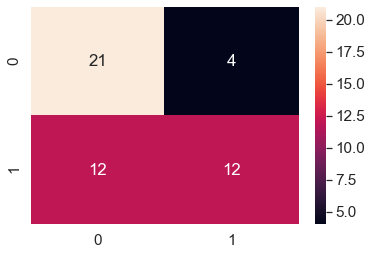

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True) # font size

plt.show()